# Analyse en composantes principales

Analyse des données des Iris de Fisher

In [1]:
import pandas as pd

In [2]:
#Chargement des données IRIS
iris = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=1,
    sep=',')

iris.columns=['sepal_long', 'sepal_epais', 'petal_long', 'petal_epais', 'iris']
iris.dropna(how="all", inplace=True)

## Visualisation des données

In [3]:
print(iris.head())

   sepal_long  sepal_epais  petal_long  petal_epais         iris
0         4.7          3.2         1.3          0.2  Iris-setosa
1         4.6          3.1         1.5          0.2  Iris-setosa
2         5.0          3.6         1.4          0.2  Iris-setosa
3         5.4          3.9         1.7          0.4  Iris-setosa
4         4.6          3.4         1.4          0.3  Iris-setosa


## Statistiques Descriptives

In [4]:
iris.describe()

,sepal_long,sepal_epais,petal_long,petal_epais
count,148.000000,148.000000,148.000000,148.000000
mean,5.854730,3.051351,3.790541,1.212162
std,0.827695,0.434950,1.754657,0.759332
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualisation de la médiane

In [5]:
# split

X = iris.ix[:,0:4].values
y = iris.ix[:,4].values

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


In [6]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

py.sign_in("serger92", "z1NFIbETekJJ4ZXOMJZB")

# plotting histograms
traces = []
legend = {0:False, 1:False, 2:False, 3:True}
colors = {'Iris-setosa': 'rgb(31, 119, 180)', 
          'Iris-versicolor': 'rgb(255, 127, 14)', 
          'Iris-virginica': 'rgb(44, 160, 44)'}

for col in range(4):
    for key in colors:
        traces.append(Histogram(x=X[y==key, col], 
                        opacity=0.75,
                        xaxis='x%s' %(col+1),
                        marker=Marker(color=colors[key]),
                        name=key,
                        showlegend=legend[col]))

data = Data(traces)

layout = Layout(barmode='overlay',
                xaxis=XAxis(domain=[0, 0.25], title='Longeur des sépales (cm)'),
                xaxis2=XAxis(domain=[0.3, 0.5], title='Epaisseur des sépales (cm)'),
                xaxis3=XAxis(domain=[0.55, 0.75], title='Longueur des pétales (cm)'),
                xaxis4=XAxis(domain=[0.8, 1], title='Epaisseur des pétales (cm)'),
                yaxis=YAxis(title='Nombre'),
                title='Distribution IRIS')

fig = Figure(data=data, layout=layout)
py.iplot(fig)


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis


/home/nbuser/anaconda3_501/lib/py

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [8]:
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Matrice des covariances \n%s' %cov_mat)

Matrice des covariances 
[[ 1.00680272 -0.10589021  0.87596191  0.82070261]
 [-0.10589021  1.00680272 -0.42176977 -0.35631985]
 [ 0.87596191 -0.42176977  1.00680272  0.96839787]
 [ 0.82070261 -0.35631985  0.96839787  1.00680272]]


In [9]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Vecteurs propres \n%s' %eig_vecs)
print('\nValeurs propres \n%s' %eig_vals)

Vecteurs propres 
[[ 0.52226623 -0.37300213 -0.720023    0.26395884]
 [-0.26188002 -0.92540963  0.2433236  -0.12581536]
 [ 0.58178433 -0.01934357  0.13827226 -0.80126999]
 [ 0.56584788 -0.06412694  0.63501282  0.52197953]]

Valeurs propres 
[2.90511213 0.92432636 0.14954564 0.02101587]


In [10]:
u,s,v = np.linalg.svd(X_std.T)
u

array([[-0.52226623, -0.37300213,  0.720023  ,  0.26395884],
       [ 0.26188002, -0.92540963, -0.2433236 , -0.12581536],
       [-0.58178433, -0.01934357, -0.13827226, -0.80126999],
       [-0.56584788, -0.06412694, -0.63501282,  0.52197953]])

In [11]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Tout est OK !')

Tout est OK !


In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

In [13]:
# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Valeurs propres :')
for i in eig_pairs:
    print(i[0])

Valeurs propres :
2.90511213408964
0.9243263550026632
0.14954564404249704
0.02101586686520125


In [14]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [15]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), 
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52226623 -0.37300213]
 [-0.26188002 -0.92540963]
 [ 0.58178433 -0.01934357]
 [ 0.56584788 -0.06412694]]


In [16]:
Y = X_std.dot(matrix_w)

In [17]:
traces = []

for name in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):

    trace = Scatter(
        x=Y[y==name,0],
        y=Y[y==name,1],
        mode='markers',
        name=name,
        marker=Marker(
            size=12,
            line=Line(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8))
    traces.append(trace)


data = Data(traces)
layout = Layout(showlegend=True,
                scene=Scene(xaxis=XAxis(title='PC1'),
                yaxis=YAxis(title='PC2'),))

fig = Figure(data=data, layout=layout)
py.iplot(fig)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:426: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


/home/nbuser/anaconda3_501

PlotlyRequestError: Account limit reached: Your account is limited to creating 25 charts. To continue, you can override or delete existing charts or you can upgrade your account at: https://plot.ly/products/cloud

In [18]:
!pip install matplotlib

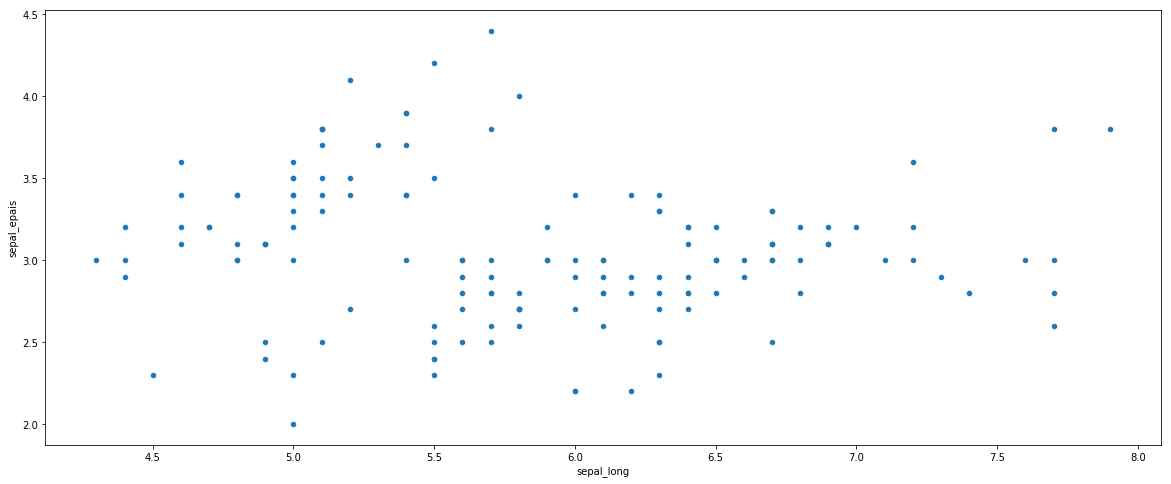

In [19]:
%matplotlib inline
import matplotlib

# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the Iris features.
iris.plot(kind="scatter", x="sepal_long", y="sepal_epais", figsize = (20, 8))

In [20]:
!pip install seaborn
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



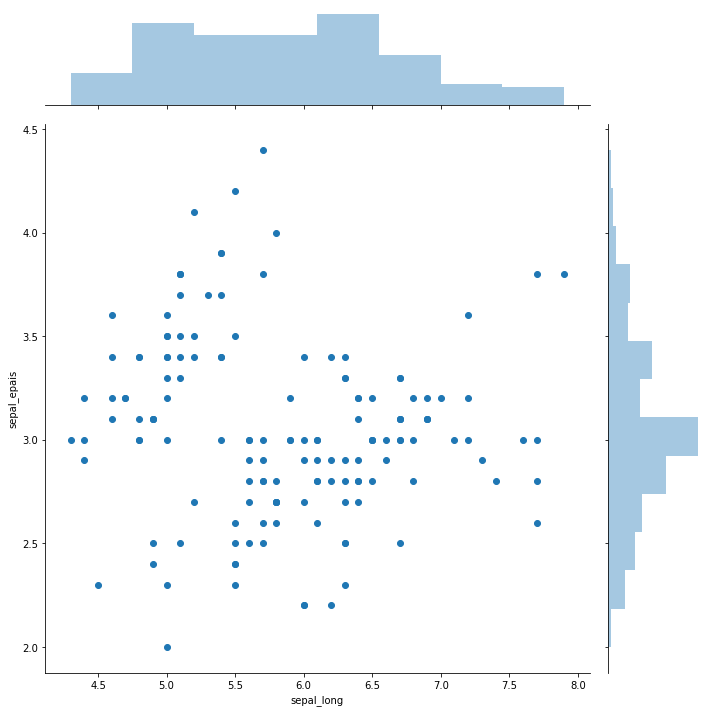

In [21]:
sns.jointplot(x="sepal_long", y="sepal_epais", data=iris, size=10)

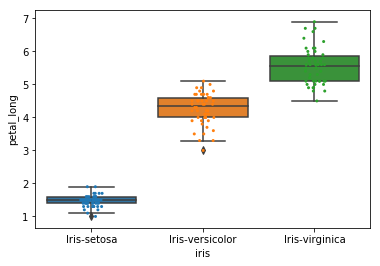

In [22]:
figsize = (20, 8)
ax = sns.boxplot(x="iris", y="petal_long", data=iris)
ax = sns.stripplot(x="iris", y="petal_long", data=iris, jitter=True, edgecolor="gray", size=3)


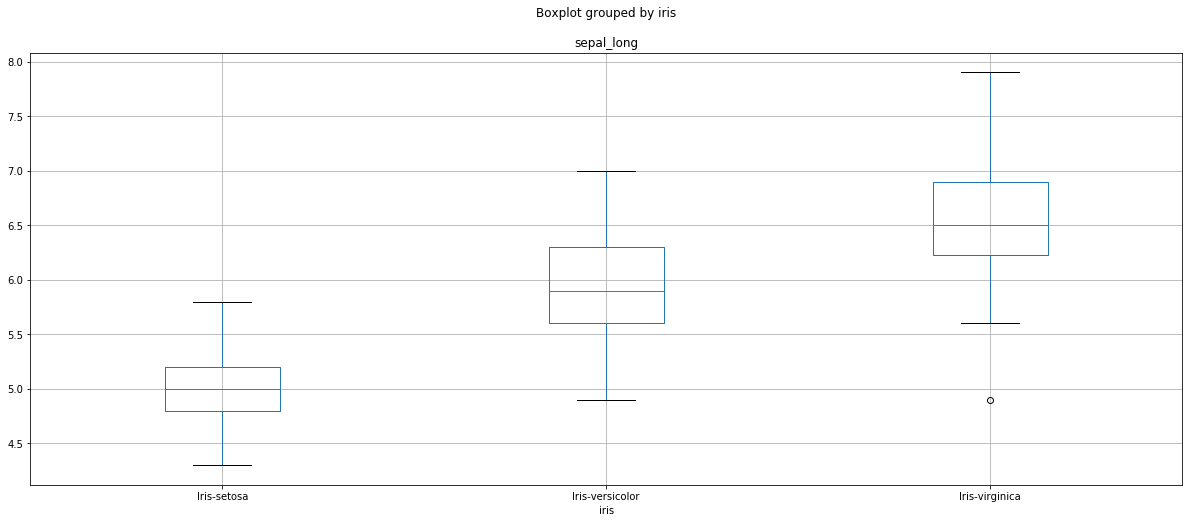

In [23]:
iris.boxplot(column='sepal_long',by='iris', figsize = (20, 8))

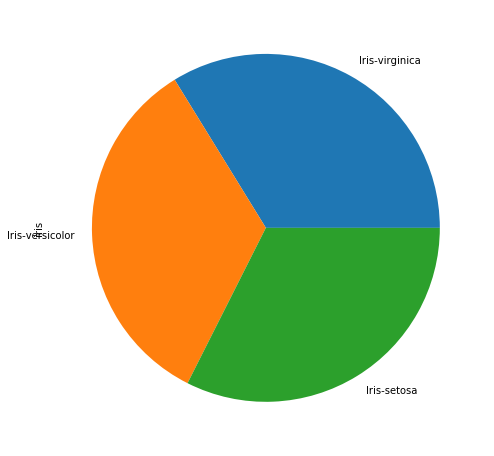

In [24]:
iris['iris'].value_counts().plot.pie(figsize = (8, 8))

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning:

'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bfc14e898>,
      dtype=object)

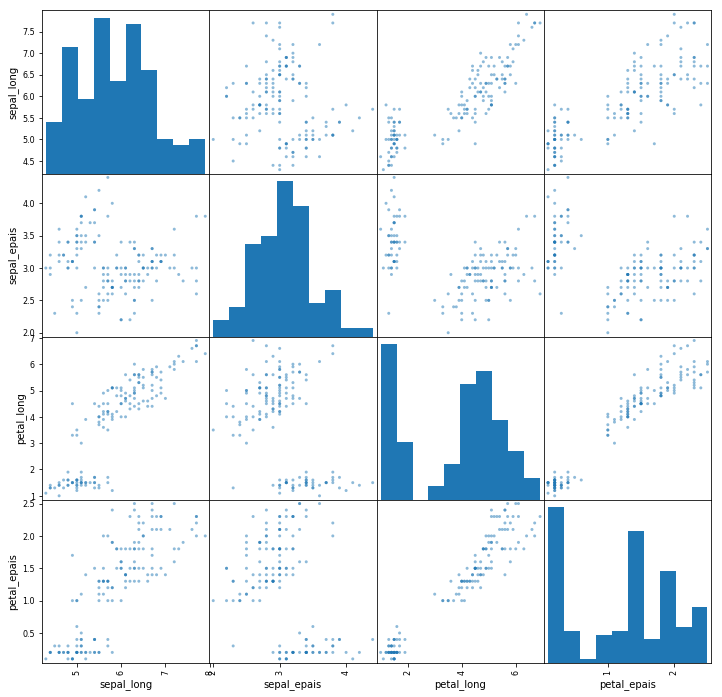

In [25]:
pd.tools.plotting.scatter_matrix(iris.select_dtypes(exclude=['object']), figsize = (12, 12))